<a href="https://colab.research.google.com/github/HamnahUmmerKK/CognoRise-Infotech/blob/machine-learning/sentiment_analysis_on_movie_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA**

In [3]:
import numpy as np
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**DATA LOADING**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df=pd.read_csv('/content/drive/MyDrive/Cognorise info tech internship ML/IMDB Dataset.csv',encoding='ISO-8859-1')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


**DATA EXPLORATION**

In [7]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [9]:
df.isna().sum()

,0
review,0
sentiment,0


In [10]:
df.dtypes

,0
review,object
sentiment,object


In [11]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


**DATA VISUALIZATION**

<ipython-input-12-9fab83fc0109>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'],data=df,palette='Set1')


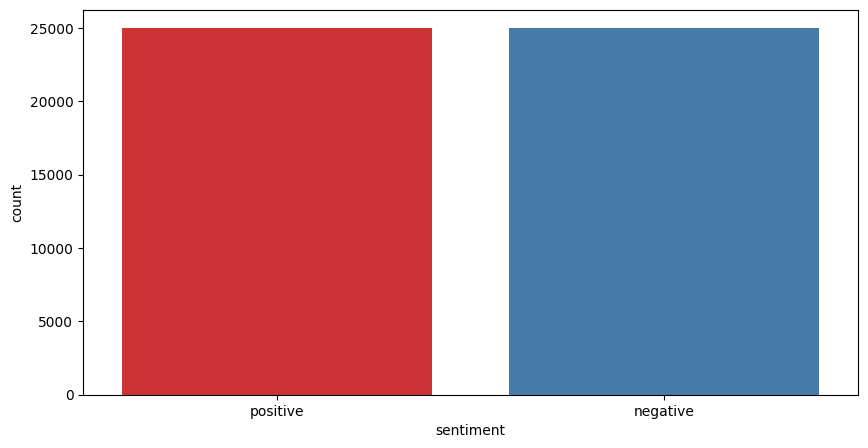

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['sentiment'],data=df,palette='Set1')
plt.show()
pass

**MAPPING**

In [13]:
df['sentiment']=df['sentiment'].map({'positive':1,'negative':0})
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [14]:
tweets=df['review']
tweets

**TOKENIZE**

In [ ]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))#(to apply lambda fuction we use .apply)
tweets

**REMOVAL OF SPECIAL CHARACTER**

In [16]:

tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')   #+ is used to remove combination of special characters
tweets

**fetching words with length > 3**

In [ ]:

from nltk.tokenize import word_tokenize
tweets=tweets.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
tweets

**stemming**

In [ ]:

from nltk.stem import SnowballStemmer
st=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[st.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweets

**removal of stopwords**

In [ ]:

from nltk.corpus import stopwords
sw=stopwords.words('english')
tweets=tweets.apply(lambda x: [i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
tweets

**vectorization**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(tweets)
data

In [21]:
print(data)

  (0, 60231)	0.05665195447078746
  (0, 16928)	0.0922364199448745
  (0, 67533)	0.058180664215437765
  (0, 71433)	0.050952736179106596
  (0, 69305)	0.08719730899209864
  (0, 14343)	0.08009746518040593
  (0, 7025)	0.04680161057053797
  (0, 41745)	0.045964524262390685
  (0, 22698)	0.05558364466064431
  (0, 60748)	0.07038281086837855
  (0, 63585)	0.06424840604322234
  (0, 37384)	0.053308545842967237
  (0, 8118)	0.09568298939256839
  (0, 68595)	0.043600958982566586
  (0, 13596)	0.06264964490887182
  (0, 43035)	0.0640658471036766
  (0, 40991)	0.0701463628031848
  (0, 72685)	0.03115590202097186
  (0, 26809)	0.05759853600497417
  (0, 48032)	0.05941849552661389
  (0, 36231)	0.046798783718779
  (0, 33179)	0.20441912209136223
  (0, 46236)	0.12667780504741621
  (0, 61622)	0.08705180458318514
  (0, 28584)	0.0810446052521778
  :	:
  (49999, 73958)	0.09360764528088412
  (49999, 62866)	0.08332529465873047
  (49999, 29539)	0.08731158779851228
  (49999, 45821)	0.08756752418085673
  (49999, 27694)	0.05347

In [22]:
data.shape

(50000, 75361)

In [23]:
y=df['sentiment'].values
y

array([1, 1, 1, ..., 0, 0, 0])

**train test split**

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.3,random_state=42)

**model creation  and performance evaluation**

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
lr=LogisticRegression()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
xg=XGBClassifier()
dt=DecisionTreeClassifier()
abc=MultinomialNB()
lst=[lr,rf,knn,xg,dt,abc]

In [ ]:
for i in lst:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("model",i)
  print(y_pred)
  print("score is",accuracy_score(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))

model LogisticRegression()
[0 1 0 ... 0 1 1]
score is 0.8933333333333333
[[6522  889]
 [ 711 6878]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7411
           1       0.89      0.91      0.90      7589

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000

model RandomForestClassifier()
[0 1 0 ... 0 1 1]
score is 0.8522666666666666
[[6365 1046]
 [1170 6419]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      7411
           1       0.86      0.85      0.85      7589

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000

